## Machine Learning

- Enabling a machine to learn by its own and improve
- Finds out patterns and inferences 
- Basic step to Artificial Intelligence (AI)
- Uses different algoriths

### Index of Content

- <a href="#linreg">Linear Regression</a>
    - <a href="#lrown">Without using predefined model</a>
    - <a href="#lrpredf">Using predefined model</a>
    - <a href="#lrpredfmult">Multiple Linear Regression</a>
- <a href="#savemodel">Saving the Model</a>
    - <a href="#pickle">Using pickle</a>
    - <a href="#joblib">Using joblib</a>
- <a href="#graddec">Gradient decent</a>
- <a href="#onehotenc">One hot encoding</a>
- <a href="#split">Train-Test split</a>
- <a href="#logreg">Logistic regression</a>
- <a href="#dectree">Decision tree</a>
- <a href="#svm">SVM</a>
- <a href="#randfrst">Random Forest</a>
- <a href="#kmean">Unsupervised learning: KMEANS</a>

## <a id="linreg">Linear Regression</a>

- Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables
- Supervised Learning based Machine Learning algorithm
- Considers a linear relationship between the independent and the dependent variable
- Simplest form of regression
- It uses the line equation formula : y = mx + c
- y : The dependent variable (Output)
- x : The independent variable (Input)
- m : The slope of the best fit line
- c : The intercept of the best fit line

## <a id="lrown">Using own model</a>

### Import required packages

- math, numpy (Numerical Python) : for the numerical operations
- statistics : for statistical operations

In [5]:
import numpy as np
import math
import statistics as st

### Method for finding the slope of two variables

- Takes four parameters : x, y, x_mean and y_mean
- x : Independent variable (Array like)
- y : Dependent variable (Array like)
- x_mean : Average/Mean of the values in x (float or int)
- y_mean : Average/Mean of the values in y (float or int)
- Method will return the slope of the best fit line for x and y

In [6]:
def get_slope(x,y,x_mean, y_mean):
    ## Lets calculate slope : for slope we need r(PCC) , standard deviation of y and x
        # r(PCC)  = Summation of ( (x - mean of x) * (y - mean of y)) / sq ( summation of ((x - mean of x)*2) * summation of ((y - mean of y)*2))
    # notebook varible : 
    # x_min_xmean = (x - mean of x)
    # y_min_ymean = (y - mean of y)
    # summ_xxm_yym = summation of ( x_min_xmean * y_min_ymean)
    # summ_xxm_sq = summation of ((x - mean of x)*2)
    # summ_yym_sq = summation of ((y - mean of y)*2)
    # r = pearson correlation coefficient 
    # st_x = standard deviation of x
    # st_y = standard deviation of y
    # slope = slope of line
    
    x_min_xmean = [(i-x_mean) for i in x]
    y_min_ymean = [(i-y_mean) for i in y]
    summ_xxm_yym = sum([(y_min_ymean[i] * x_min_xmean[i]) for i in range(0, len(x_min_xmean))])
    summ_xxm_sq = sum([(i-x_mean)*(i-x_mean)  for i in x])
    summ_yym_sq = sum([(i-y_mean)*(i-y_mean)  for i in y])

    r = summ_xxm_yym / math.sqrt(summ_xxm_sq * summ_yym_sq)

    st_x = st.stdev(x)
    st_y = st.stdev(y)

    slope = r * (st_y / st_x)
    return slope

### Method for finding the intercept

- Takes three parameters : x_mean, y_mean and slope
- x_mean : Average/Mean of the values of the dependent variable (x) (float or int)
- y_mean : Average/Mean of the values of the independent variable (y) (float or int)
- slope : The slope of the best fit line for x and y (float or int)
- Method will return the intercept of the best fit line for x and y

In [7]:
def get_y_intercept(x_mean, y_mean, slope):
    y_intercept = y_mean - (slope * x_mean)
    return y_intercept

### Method for predicting the y value while x value is given as an input

- Takes three parameters : slope, y_intercept and new_input
- slope : The slope of the best fit line for x and y (float or int)
- y_intercept : The intercept of the best fit line for x and y (float or int)
- new_input : The x value for which the prediction is required (float or int)
- The method returns the predicted y value

In [8]:
def prediction(slope, y_intercept, new_input):
    y = (slope * new_input) + y_intercept
    return y

### Preparing the dataset

In [9]:
x = [0,1,2,3,4,5,6,7,8,9] ## Independent variable
y = [1,3,2,5,7,8,8,9,10,12]  ## Dependent Variable

### Finding the equation

- Equation: y = m * x + c
- y : Dependent variable
- x : Indepedent variable
- m : Slope of the best fit line
- c : y-intercept of the best fit line
- m and c are needed to be found for forming the equation

In [11]:
x_mean = np.mean(x) 
y_mean = np.mean(y)

b = get_slope(x,y,x_mean, y_mean)
a = get_y_intercept(x_mean, y_mean, b)

print("The slope is: " + str(b))
print("The y intercept is: " + str(a))
print("\nThe Equation is: y = " + str(b) + " * x + " + str(a))

The slope is: 1.1696969696969697
The y intercept is: 1.2363636363636363

The Equation is: y = 1.1696969696969697 * x + 1.2363636363636363


### Find the prediction for new input

In [13]:
new_input = 10
pred = prediction(b, a, new_input)
print("The predicted y value for the input " + str(new_input) + " is: " + str(pred))

The predicted y value for the input 10 is: 12.933333333333334


## <a id="lrpredf">Using sklearn's prebuilt model</a>

### Import required packages

- numpy (Numerical Python) : for the numerical operations
- pandas : for importing and manipulating the data
- matplotlib.pyplot : for visualizing the data
- sklearn : for using the prebuild machine learning models

In [15]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Preparing the data

- area : Independent variable
- price : Dependent variable

In [16]:
df_json = {
    "area": [2600, 3000, 3200, 3600, 4000],
    "price": [550000, 565000, 610000, 680000, 725000]
}

df = pd.DataFrame(df_json)

df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


### Visualizing the relation between area and price

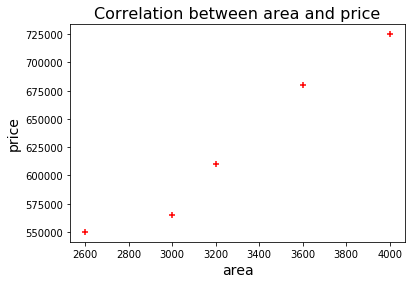

In [18]:
plt.scatter(df["area"], df["price"], color="r", marker="+")
plt.title("Correlation between area and price", fontsize=16)
plt.xlabel("area", fontsize=14)
plt.ylabel("price", fontsize=14)
plt.show()

**Note:** From the above visualization following inferences can be drawn -
 
- price and area is having a positive correlation
- The relation between area and price is Linear

### Build the linear regression model

- Using sklearn's prebuilt model : **linear_model.LinearRegression()**

In [20]:
model =  linear_model.LinearRegression()

### Train the linear regression model with the training data set

- Using .fit() method of the model
- Passing two parameters:
    - 1. The independent variables (numpy array or sparse matrix of shape [n_samples,n_features])
    - 2. The dependent variable or target data (numpy array of shape [n_samples, n_targets])    

In [23]:
model.fit(df.loc[:,["area"]], df.loc[:,"price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Make prediction based for a new input data

- Using .predict() method of the model
- Parameter is x values as input
- It will return predicted y values for the input x values
- Shape of the input should be same as the shape of the independent variable for training

In [27]:
model.predict([[3000]])

array([587979.45205479])

### Check the coefficient values

- Using .coef_ we can get the array of coeeficients of all independent variable in the best fit equation

In [16]:
model.coef_

array([135.78767123])

### Check the coefficient values

- Using .intercept_ we can get the y-intercept in the best fit equation

In [28]:
model.intercept_

180616.43835616432

### Evaluating the accuracy score of the model

- Using the .score() method of the model
- Parameters will be the independent and the dependent variables
- It will return the training accuracy score of the model

In [18]:
model.score(df[["area"]], df["price"])

0.9584301138199486

### Creating inputs for prediction

In [19]:
df_check = {
    "price": [1000, 1500,2300, 3500,4100,4200,4800]
}
df_check = pd.DataFrame(df_check)

### Predicting the dependent variable for the created input

In [20]:
model.predict(df_check)

array([316404.10958904, 384297.94520548, 492928.08219178, 655873.28767123,
       737345.89041096, 750924.65753425, 832397.26027397])

### Viaualizing the distribution of the predicted values around the best fit line

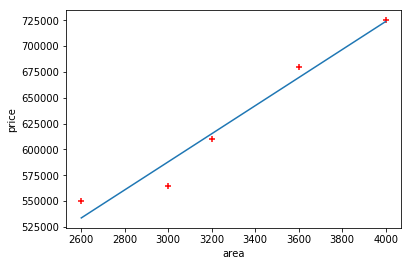

In [29]:
plt.scatter(df["area"], df["price"], color="r", marker="+")
plt.plot(df["area"], model.predict(df[["area"]]))
plt.xlabel("area")
plt.ylabel("price")
plt.show()

## <a id="lrpredfmult">Multiple linear regression</a>

- Linear regression with more than one independent variables
- The equation used is : y = m1 * x1 + m2 * x2 + .... + mn * xn + c

### Preparing the data

- Columns : size, age, bedroom, price
- size : Size of the flat (in squarefeet)
- age : Based on the time the flat was built
- bedroom : Number of bedrooms
- price : price of the flat

In [30]:
df = {
    "size":[100,255,90,154,172],
    "age":[4,10,2,6,1],
    "bedroom":[2,6,2,3,3],
    "price": [50000,90000,49000,72000,78000]
}
df = pd.DataFrame(df)

df

,size,age,bedroom,price
0,100,4,2,50000
1,255,10,6,90000
2,90,2,2,49000
3,154,6,3,72000
4,172,1,3,78000


### Creating the model

- Using linear_model.LinearRegression() model from sklearn
- Named it as model

In [ ]:
model = linear_model.LinearRegression()

### Training the model

- Passing two parameters : independent variables (X) and dependent variable (y) 
- X : size, age, bedroom
- y : price
- Consideration : price is dependent on the size, age and number of bedrooms of the flat
- Using .fit() method of the model

In [31]:
model.fit(df[["size","age","bedroom"]], df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Making predictions for a new x value

- Input will be size, age and the number of bedrooms
- Output will be the price of the flat

In [25]:
model.predict([[255,10,3],[70,1,1]])

array([121647.08917921,  47590.61749239])

## <a id="savemodel">Saving the model</a>

- 1. As pickle file
- 2. As joblib

##### <a id="pickle">1. pickle</a>

#### Save the model as pickle file

In [32]:
import pickle

with open("log_pickle", "wb") as f:
    pickle.dump(model,f)

#### Opening the saved model (pickle) for reuse

In [27]:
with open("log_pickle", "rb") as f:
    mp = pickle.load(f)

#### Use the model

In [28]:
mp.predict([[255,10,3],[70,1,1]])

array([121647.08917921,  47590.61749239])

##### <a id="joblib">2. joblib</a>

#### Save the model as joblib

In [34]:
from sklearn.externals import joblib

joblib.dump(model,"log_joblib")

['log_joblib']

#### Loading the joblib

In [35]:
mj = joblib.load("log_joblib")

#### Using the model

In [36]:
mj.predict([[255,10,3],[70,1,1]])

array([121647.08917921,  47590.61749239])

## <a id="graddec">Gradient descent method</a>

- Optimization algorithm used for minimization of some functions
- In machine learning it is used for updating the parameter values
- Here let us consider linear regression equation y = m * x + b
- Gradient decent can be used for finding the best values of m and b where cost will be optimised
- The method takes two parameters : y and x which are dependent and independent variables respectively

In [37]:
def gradient_decent(x,y):
    ## assume a value for mcurr and bcurr
    mcurr = bcurr = 0
    ## No of iteration you want
    iteration = 1000000
    ## Learning rate
    l_rate = 0.08
    n = len(x)
    cost = 0
    
    for i in range(iteration):
        y_predicted = mcurr* x + bcurr
#         cost
        prev_cost = cost
        cost = (1/n) * sum([val**2 for val in (y - y_predicted)])
        if (math.isclose(cost, prev_cost, rel_tol=1e-09)):
            break
        
        plt.plot(x, y_predicted, color="r")
        plt.scatter(x,y,c="b")
        ## derivative wrt m
        dm = -(2/n) * sum(x* (y-y_predicted))
        db = -(2/n) * sum(y-y_predicted)
        
        ## we try to fin derivatives to update the mcurr and bcurr, mcurr = mcurr - learningRate * d/dm
        
        mcurr = mcurr - l_rate * dm
        bcurr = bcurr - l_rate * db
        print(" cost={},m={}, b={}, iter={}".format(cost,mcurr, bcurr, i))
        
#         print(y_predicted)

## Using the gradient decent method for some data

- Creating dummy x and y data

 cost=89.0,m=4.96, b=1.44, iter=0
 cost=71.10560000000002,m=0.4991999999999983, b=0.26879999999999993, iter=1
 cost=56.8297702400001,m=4.451584000000002, b=1.426176000000001, iter=2
 cost=45.43965675929613,m=0.892231679999997, b=0.5012275199999995, iter=3
 cost=36.35088701894832,m=4.041314713600002, b=1.432759910400001, iter=4
 cost=29.097483330142282,m=1.2008760606719973, b=0.7036872622079998, iter=5
 cost=23.307872849944438,m=3.7095643080294423, b=1.4546767911321612, iter=6
 cost=18.685758762535738,m=1.4424862661541864, b=0.881337636696883, iter=7
 cost=14.994867596913156,m=3.4406683721083144, b=1.4879302070713722, iter=8
 cost=12.046787238456794,m=1.6308855378034224, b=1.0383405553279617, iter=9
 cost=9.691269350698109,m=3.2221235247119777, b=1.5293810083298451, iter=10
 cost=7.8084968312098315,m=1.7770832372205707, b=1.1780607551353204, iter=11
 cost=6.302918117062937,m=3.0439475772474127, b=1.5765710804477953, iter=12
 cost=5.098330841763168,m=1.8898457226770244, b=1.3032248704973

 cost=0.0015355171123361485,m=2.0247482311338474, b=2.9106349186871068, iter=117
 cost=0.0014535760190984004,m=2.0240865833684647, b=2.913054180752923, iter=118
 cost=0.0013760076235662848,m=2.023428189878564, b=2.9154039518155925, iter=119
 cost=0.0013025785802224434,m=2.022800678820807, b=2.917693788383387, iter=120
 cost=0.0012330679960976523,m=2.022178465672161, b=2.9199184564080576, iter=121
 cost=0.0011672667661862604,m=2.02158350701329, b=2.9220858398601313, iter=122
 cost=0.0011049769443404755,m=2.0209953315370366, b=2.924192022116131, iter=123
 cost=0.0010460111477470864,m=2.0204313774161093, b=2.9262435394397723, iter=124
 cost=0.0009901919931925812,m=2.0198752542326663, b=2.928237511969676, iter=125
 cost=0.0009373515634185398,m=2.0193408010377287, b=2.930179388022848, iter=126
 cost=0.0008873309019597829,m=2.018814884960359, b=2.9320671014410826, iter=127
 cost=0.0008399795349445472,m=2.0183084787384074, b=2.933905220429537, iter=128
 cost=0.000795155018416705,m=2.017811050

 cost=5.116668960713494e-07,m=2.000451838538916, b=2.9983687195058537, iter=263
 cost=4.843623981059332e-07,m=2.000439617347614, b=2.9984128418862372, iter=264
 cost=4.5851497233914773e-07,m=2.0004277267104196, b=2.9984557708575847, iter=265
 cost=4.340468638386762e-07,m=2.000416157688441, b=2.99849753869937, iter=266
 cost=4.108844669714397e-07,m=2.000404901581087, b=2.998538176817019, iter=267
 cost=3.8895810398314835e-07,m=2.0003939499262042, b=2.9985777157673743, iter=268
 cost=3.6820181538911237e-07,m=2.000383294487745, b=2.9986161852800164, iter=269
 cost=3.4855316155576877e-07,m=2.000372927254906, b=2.9986536142810962, iter=270
 cost=3.299530348643825e-07,m=2.0003628404313454, b=2.998690030913766, iter=271
 cost=3.1234548190677067e-07,m=2.00035302643357, b=2.9987254625605178, iter=272
 cost=2.956775351618141e-07,m=2.000343477881438, b=2.9987599358627213, iter=273
 cost=2.79899053655233e-07,m=2.000334187596001, b=2.9987934767415956, iter=274
 cost=2.649625721285466e-07,m=2.000325

 cost=2.7930077970132387e-10,m=2.000010556639356, b=2.9999618871823226, iter=400
 cost=2.643962243711541e-10,m=2.0000102711065746, b=2.99996291804626, iter=401
 cost=2.502870329622e-10,m=2.0000099932967985, b=2.9999639210277027, iter=402
 cost=2.3693076185203976e-10,m=2.0000097230011358, b=2.999964896880807, iter=403
 cost=2.2428723232198128e-10,m=2.00000946001635, b=2.9999658463393324, iter=404
 cost=2.123184098017384e-10,m=2.0000092041446944, b=2.9999667701171915, iter=405
 cost=2.009882892874985e-10,m=2.0000089551937803, b=2.9999676689089876, iter=406
 cost=1.9026278725365386e-10,m=2.0000087129764132, b=2.999968543390535, iter=407
 cost=1.801096389315596e-10,m=2.000008477310469, b=2.999969394219371, iter=408
 cost=1.7049830135819875e-10,m=2.000008248018745, b=2.9999702220352464, iter=409
 cost=1.6139986140957615e-10,m=2.0000080249288357, b=2.9999710274606093, iter=410
 cost=1.5278694893507006e-10,m=2.0000078078729926, b=2.9999718111010707, iter=411
 cost=1.4463365436189395e-10,m=2.0

 cost=3.8729711367894076e-13,m=2.000000393107873, b=2.999998580755848, iter=520
 cost=3.6662946209719744e-13,m=2.0000003824752093, b=2.9999986191431334, iter=521
 cost=3.4706471434540025e-13,m=2.000000372130137, b=2.9999986564921315, iter=522
 cost=3.285440172652174e-13,m=2.0000003620648727, b=2.999998692830925, iter=523
 cost=3.110116548243936e-13,m=2.000000352271853, b=2.999998728186838, iter=524
 cost=2.9441488613447097e-13,m=2.0000003427437094, b=2.9999987625864546, iter=525
 cost=2.7870378404590235e-13,m=2.0000003334732828, b=2.9999987960556416, iter=526
 cost=2.6383108681567987e-13,m=2.0000003244535973, b=2.9999988286195634, iter=527
 cost=2.497520536662102e-13,m=2.0000003156778754, b=2.9999988603027066, iter=528
 cost=2.364243307472874e-13,m=2.0000003071395156, b=2.9999988911288935, iter=529
 cost=2.2380782638747993e-13,m=2.0000002988320995, b=2.999998921121303, iter=530
 cost=2.1186458671642428e-13,m=2.000000290749379, b=2.9999989503024866, iter=531
 cost=2.0055868396687573e-13

 cost=1.291477235629079e-15,m=2.000000022700373, b=2.9999999180444514, iter=624
 cost=1.2225590761280625e-15,m=2.0000000220863794, b=2.99999992026116, iter=625
 cost=1.1573186729525524e-15,m=2.0000000214889946, b=2.999999922417912, iter=626
 cost=1.0955597088101686e-15,m=2.0000000209077666, b=2.9999999245163287, iter=627
 cost=1.0370964926627878e-15,m=2.0000000203422594, b=2.999999926557988, iter=628
 cost=9.817530551795921e-16,m=2.0000000197920484, b=2.999999928544425, iter=629
 cost=9.293629982148697e-16,m=2.000000019256719, b=2.999999930477134, iter=630
 cost=8.797686140212255e-16,m=2.0000000187358693, b=2.9999999323575675, iter=631
 cost=8.328208274038475e-16,m=2.0000000182291067, b=2.9999999341871395, iter=632
 cost=7.883783085162685e-16,m=2.000000017736052, b=2.999999935967226, iter=633
 cost=7.463074562930642e-16,m=2.000000017256332, b=2.9999999376991644, iter=634
 cost=7.064816213651775e-16,m=2.000000016789589, b=2.9999999393842587, iter=635
 cost=6.687810649773406e-16,m=2.0000

 cost=1.1548458810001985e-18,m=2.0000000006788143, b=2.9999999975492617, iter=752
 cost=1.0932181895991652e-18,m=2.0000000006604557, b=2.999999997615549, iter=753
 cost=1.034880721471997e-18,m=2.0000000006425895, b=2.9999999976800424, iter=754
 cost=9.796547277287717e-19,m=2.0000000006252114, b=2.9999999977427927, iter=755
 cost=9.273765491320285e-19,m=2.0000000006082987, b=2.9999999978038443, iter=756
 cost=8.77888233707648e-19,m=2.000000000591848, b=2.9999999978632457, iter=757
 cost=8.310409108585063e-19,m=2.0000000005758376, b=2.9999999979210394, iter=758
 cost=7.866933308831736e-19,m=2.0000000005602647, b=2.999999997977271, iter=759
 cost=7.44712309917287e-19,m=2.0000000005451084, b=2.9999999980319805, iter=760
 cost=7.049723718834706e-19,m=2.000000000530367, b=2.9999999980852117, iter=761
 cost=6.67351770785807e-19,m=2.0000000005160197, b=2.999999998137002, iter=762
 cost=6.317388553066741e-19,m=2.000000000502064, b=2.999999998187392, iter=763
 cost=5.980272862076605e-19,m=2.0000

 cost=1.994206964872547e-21,m=2.0000000000282077, b=2.9999999998981597, iter=868
 cost=1.887788548492109e-21,m=2.000000000027445, b=2.9999999999009144, iter=869
 cost=1.787044867088884e-21,m=2.0000000000267026, b=2.9999999999035944, iter=870
 cost=1.6916639392699475e-21,m=2.0000000000259806, b=2.999999999906202, iter=871
 cost=1.601429377806871e-21,m=2.0000000000252776, b=2.9999999999087392, iter=872
 cost=1.5159225260131e-21,m=2.000000000024594, b=2.9999999999112075, iter=873
 cost=1.4350256386676936e-21,m=2.000000000023929, b=2.999999999913609, iter=874
 cost=1.3584633605584684e-21,m=2.000000000023282, b=2.999999999915946, iter=875
 cost=1.2859741822443052e-21,m=2.0000000000226517, b=2.999999999918219, iter=876
 cost=1.217357952516382e-21,m=2.0000000000220397, b=2.9999999999204316, iter=877
 cost=1.1523815435712275e-21,m=2.000000000021443, b=2.9999999999225837, iter=878
 cost=1.0908601702638202e-21,m=2.0000000000208633, b=2.9999999999246776, iter=879
 cost=1.0326828983982743e-21,m=2.

 cost=1.213627319486154e-24,m=2.0000000000006963, b=2.9999999999974873, iter=1003
 cost=1.1495359996971106e-24,m=2.0000000000006763, b=2.999999999997555, iter=1004
 cost=1.0886892648112415e-24,m=2.0000000000006595, b=2.9999999999976215, iter=1005
 cost=1.0299786074845297e-24,m=2.0000000000006404, b=2.9999999999976854, iter=1006
 cost=9.748025203297513e-25,m=2.0000000000006244, b=2.9999999999977485, iter=1007
 cost=9.22796391836513e-25,m=2.000000000000606, b=2.999999999997809, iter=1008
 cost=8.731573193754809e-25,m=2.000000000000591, b=2.9999999999978684, iter=1009
 cost=8.271302832272746e-25,m=2.0000000000005738, b=2.9999999999979257, iter=1010
 cost=7.833672778770527e-25,m=2.00000000000056, b=2.999999999997982, iter=1011
 cost=7.4146377545261775e-25,m=2.000000000000543, b=2.9999999999980362, iter=1012
 cost=7.024522371067231e-25,m=2.0000000000005294, b=2.9999999999980895, iter=1013
 cost=6.641593510454847e-25,m=2.000000000000515, b=2.999999999998141, iter=1014
 cost=6.292601445985071

 cost=1.997395812019602e-27,m=2.000000000000029, b=2.9999999999998987, iter=1120
 cost=1.8839576138488206e-27,m=2.0000000000000266, b=2.999999999999901, iter=1121
 cost=1.801758307524791e-27,m=2.0000000000000275, b=2.999999999999904, iter=1122
 cost=1.713563658321082e-27,m=2.000000000000025, b=2.9999999999999063, iter=1123
 cost=1.6187425775135162e-27,m=2.000000000000026, b=2.9999999999999094, iter=1124
 cost=1.5147707102053869e-27,m=2.0000000000000235, b=2.999999999999911, iter=1125
 cost=1.4428265956492306e-27,m=2.000000000000025, b=2.9999999999999143, iter=1126
 cost=1.3505298697383722e-27,m=2.000000000000022, b=2.999999999999916, iter=1127
 cost=1.2893142634932218e-27,m=2.0000000000000235, b=2.9999999999999187, iter=1128
 cost=1.2004885255653359e-27,m=2.0000000000000213, b=2.9999999999999205, iter=1129
 cost=1.1643586961062134e-27,m=2.000000000000022, b=2.999999999999923, iter=1130
 cost=1.0924145815500573e-27,m=2.00000000000002, b=2.999999999999925, iter=1131
 cost=1.0286746204081

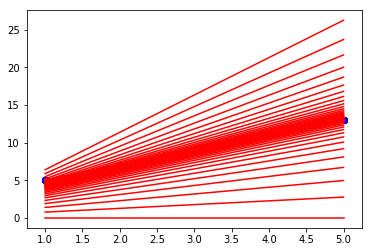

In [39]:
# x = np.array([92,86,88,70,80,49,65,35,66,67])
# y = np.array([98,68,81,80,83,52,66,30,68,73])
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradient_decent(x,y)
plt.show()

In [33]:
df = {
    "x":[92,86,88,70,80,49,65,35,66,67],
    "y":[98,68,81,80,83,52,66,30,68,73],
}
df = pd.DataFrame(df)
model = linear_model.LinearRegression()
model.fit(df[["x"]], df["y"])
print(model.coef_)
print(model.intercept_)

[0.94068621]
4.240102792054458


## <a id="onehotenc">One hot encoding</a>

- Converting the categorical variable into numerical variable

### Reading the data from a csv file

In [40]:
df = pd.read_csv("Sample.csv")

df

,sno,town,sq,price
0,1,Chennai,2600,550000
1,2,Chennai,3000,565000
2,3,Chennai,3200,610000
3,4,Chennai,3600,680000
4,5,Delhi,4000,725000
5,6,Delhi,2600,585000
6,7,Delhi,2800,615000
7,8,Delhi,3300,650000
8,9,Mumbai,3600,710000
9,10,Mumbai,2600,575000


### Dropping the unnecessary column

In [36]:
df = df.drop("sno",axis="columns")

### <a id="split">Apply One Hot Encoding</a>

- Using pd.get_dummies() method
- A categorical column is passed as parameter
- Consider it contains n number of unique categorical values
- It will return a dataframe containing n number of columns

In [41]:
df_updated = pd.get_dummies(df["town"])

df_updated

,Chennai,Delhi,Mumbai
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,0,1
9,0,0,1


### Merging the one hot encoded columns to the main data

In [43]:
df_merged = pd.concat([df,df_updated], axis="columns")

### Splitting the data into X and y

In [44]:
X = df_merged.drop(["town","price"], axis="columns")

y = df_merged["price"]

### Creating the model

In [ ]:
model = linear_model.LinearRegression()

### Training the model

In [ ]:
model.fit(X,y)

### Doing the prediction

In [ ]:
model.predict([[2600,0,0,0]])

### Train Test split

- Split the whole data into the following
    - X values
        - Train X
        - Test X
    - y values
        - Train y
        - Test y

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv("Sample.csv")

In [50]:
X = df[["sq"]]
y = df["price"]

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=10 )

In [52]:
xtrain

,sq
6,2800
8,3600
2,3200
12,3600
5,2600
10,2900
1,3000
0,2600
4,4000
9,2600


### Training model using train-x and train-y data

In [53]:
model = linear_model.LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Prediction on test-x data

In [54]:
predicted = model.predict(xtest)

### Comparing predicted values with original test-y data

In [55]:
print(ytest)

3     680000
7     650000
11    620000
Name: price, dtype: int64


In [56]:
model.score(xtest, ytest)
# print(xtest)

0.9808576170814808

## <a id="logreg">Logistic Regression</a>

- Also known as Logit regression
- Supervised Learning based Machine Learning algorithm
- This uses a logistic function
- Used for classification problems

### Logistic regression (Binary class)

### Read data

In [62]:
df = pd.read_csv("insurance.csv")

### Visualize

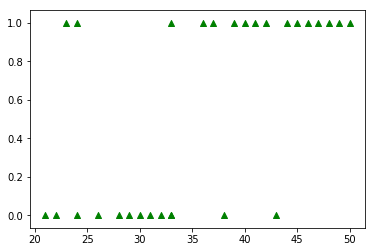

In [63]:
plt.scatter(df["age"], df["insurance"], marker="^", c="g")

### Train test split

In [64]:
xtrain, xtest, ytrain, ytest =  train_test_split(df[["age"]], df["insurance"], test_size=0.2, random_state=1 )

### Create model and train it

In [65]:
model = linear_model.LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict values

In [66]:
model.predict(xtest)

array([1, 1, 1, 1, 1, 1])

In [67]:
print(ytest)

14    1
21    0
18    1
20    1
25    1
19    1
Name: insurance, dtype: int64


### Check accuracy

In [68]:
model.score(xtest,ytest)

0.8333333333333334

### Check estimates for all classes are ordered by the label of classes.

In [70]:
model.predict_proba(xtest)

array([[0.44547327, 0.55452673],
       [0.37525975, 0.62474025],
       [0.40489388, 0.59510612],
       [0.38504633, 0.61495367],
       [0.33718716, 0.66281284],
       [0.3949268 , 0.6050732 ]])

### Logistic regression (Multiple class)

In [75]:
from sklearn.datasets import load_digits

In [76]:
digits = load_digits()

In [77]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [78]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

### Split into train and test

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(digits["data"], digits["target"], test_size=0.1, random_state=1)

### Create model and train it

In [80]:
model = linear_model.LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict values

In [81]:
model.predict(xtest)

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 8,
       8, 6, 0, 8, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 5, 1, 2,
       3, 1, 9, 0])

## <a i="dectree">Decision tree</a>

### Read data

In [82]:
df = pd.read_csv("sales.csv")

In [69]:
df.head()

,company,job,degree,salary
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


### Split into X and y

In [83]:
X = df.drop("salary", axis="columns")
y = df["salary"]

In [84]:
from sklearn.preprocessing import LabelEncoder

### Label encoding

In [85]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [86]:
X["company_"] = le_company.fit_transform(X["company"])
X["job_"] = le_job.fit_transform(X["job"])
X["degree_"] = le_degree.fit_transform(X["degree"])


### Drop useless columns

In [87]:
X = X.drop(["company","job","degree"], axis="columns")

In [75]:
from sklearn import tree

### Create the model

In [76]:
model = tree.DecisionTreeClassifier()


### Train the model

In [77]:
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Make prediction

In [78]:
model.predict([[2,1,1]])

array([1])

## <a id="svm">SVM</a>

In [90]:
from sklearn.datasets import load_iris

### Load data

In [91]:
iris = load_iris()

In [92]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

### Split data

In [93]:
df["target"] = iris.target

In [94]:
df["target_name"] = df.target.apply([lambda x: iris.target_names[x]])

In [95]:
X = df.drop(["target","target_name"], axis="columns")
y = df["target"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=1)

### Create model

In [85]:
from sklearn.svm import SVC
model = SVC()

### Train model

model.fit(xtrain, ytrain)

### Evaluate model

In [87]:
model.score(xtest, ytest)

1.0

## <a id="randfrst">Random Forest</a>

### Load data

In [88]:
from sklearn.datasets import load_digits
digits = load_digits()

In [89]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

### Split data

In [90]:
df = pd.DataFrame(digits["data"])
df["target"] = digits.target
X = df.drop("target", axis="columns")
y = df["target"]

### Create model and train

In [91]:
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier()
model.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## <a id="kmean">Unsupervised learning: KMEANS</a>

In [92]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [93]:
df = pd.read_csv("income_ul.csv")

In [94]:
df.head(2)

,Name,Age,Income
0,Xyz123,27,70000
1,Xyz124,29,90000


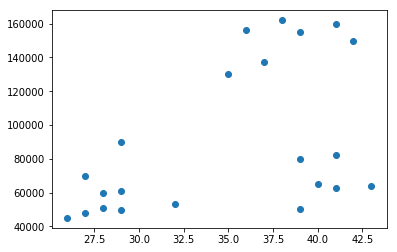

In [95]:
plt.scatter(df["Age"],df["Income"])
plt.show()

In [96]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [97]:
y_predicted = km.fit_predict(df[["Age","Income"]])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [98]:
df["cluster"] = y_predicted

In [99]:
df.head()

,Name,Age,Income,cluster
0,Xyz123,27,70000,0
1,Xyz124,29,90000,2
2,Xyz125,29,61000,0
3,Xyz126,28,60000,0
4,Xyz127,42,150000,1


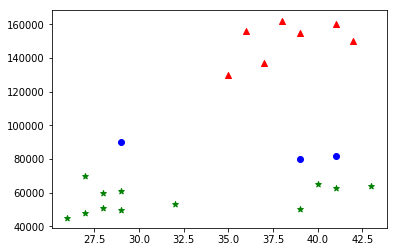

In [100]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

plt.scatter(df1["Age"], df1["Income"], c="g", marker="*")
plt.scatter(df2["Age"], df2["Income"], c="r", marker="^")
plt.scatter(df3["Age"], df3["Income"], c="b", marker="o")
plt.show()

In [101]:
scaler = MinMaxScaler()
scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])



In [102]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age","Income"]])
df["cluster"] = y_predicted

In [103]:
df.head()

,Name,Age,Income,cluster
0,Xyz123,0.058824,0.213675,0
1,Xyz124,0.176471,0.384615,0
2,Xyz125,0.176471,0.136752,0
3,Xyz126,0.117647,0.128205,0
4,Xyz127,0.941176,0.897436,2


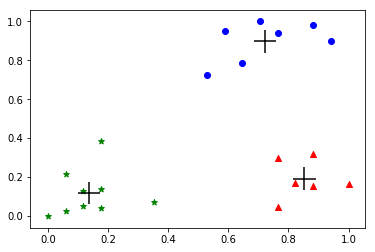

In [104]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

plt.scatter(df1["Age"], df1["Income"], c="g", marker="*")
plt.scatter(df2["Age"], df2["Income"], c="r", marker="^")
plt.scatter(df3["Age"], df3["Income"], c="b", marker="o")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c="black", marker="+",s=[500,500,500])
plt.show()

In [105]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.19088319],
       [0.72268908, 0.8974359 ]])

In [106]:
km.cluster_centers_[:,0]

array([0.1372549 , 0.85294118, 0.72268908])

In [107]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[["Age", "Income"]])
    sse.append(km.inertia_)

In [108]:
sse

[5.476381297947709,
 2.159107864954578,
 0.4914418533983004,
 0.3654682129849473,
 0.2785427797775121,
 0.23657311218308466,
 0.18339002847919542,
 0.14153235581014834,
 0.11260368847835203]

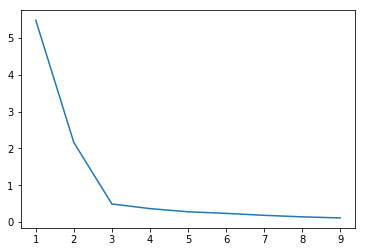

In [109]:
lst = range(1,10)
plt.plot(lst, sse)

In [110]:
### Feature elemination

# 1 Filter method
# - IG (Information gain method)
# - Chi square
# - correlation coefficient 


# 2. Wrapping method
# - Recurrsive feature elimination
# - Genetic algorithms

# 3. Embedded method
# -Decision tree


In [111]:

#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Loading the dataset
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
# df.head()

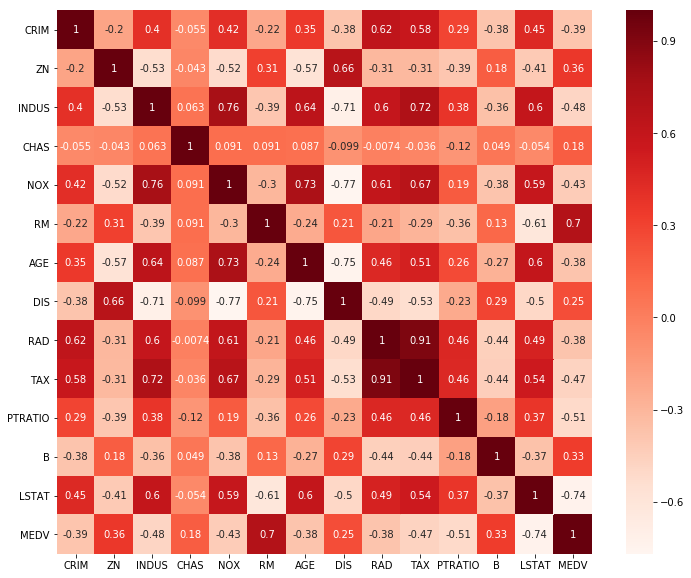

In [112]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [132]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
print(cor_target)
#Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.5]
# relevant_features

CRIM       0.385832
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


In [114]:
## IN linear regresion we check, weather all the features are correlated to each other If yes take any one of them and drop remaining
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


In [115]:
### As we can see RM and LSTAT are highly correlated we will drop either one of them.
## We wil drop RM cuz LSTAT is having higher correlation with MEDV then RM
## So, using pearson coef. we will get LSTAT and PTRATIO as most imp feature

In [116]:
## Wrapper method:  We feed all possible featue to model and then remove worst performing feature, accurate than filter method but computationally expensive.

# 1) backward elimination
# 2) forward elimination
# 3) Forward Selection
# 4) Bidirectional Elimination
# 5) RFE

In [117]:
# 1) backward elimination:

X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
print(model.pvalues)

const      3.182440e-12
CRIM       1.126402e-03
ZN         7.836070e-04
INDUS      7.345971e-01
CHAS       1.912339e-03
NOX        4.117296e-06
RM         2.207486e-18
AGE        9.546859e-01
DIS        6.017651e-13
RAD        5.189664e-06
TAX        1.117826e-03
PTRATIO    1.268218e-12
B          5.072875e-04
LSTAT      6.595808e-23
dtype: float64


In [122]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    print(cols)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [123]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

In [128]:
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True  True False  True False
  True]
[2 4 3 1 1 1 7 1 1 5 1 6 1]


In [130]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.663577


In [131]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'],
      dtype='object')


In [ ]:
## embedded method

